In [24]:
#Reading the data
import pandas as pd
data = pd.read_csv('/content/gpt.csv')
data.shape

(4001, 17)

In [2]:
#printing a few rows of the data
data.head()

,Datetime,User,Tweet Id,RawContent,Rendered Content,Text,Username,Hashtags,Source,Retweet Count,Reply Count,View Count,Like Count,Language,Media,UserLocation,SourceLabel
0,2023-03-25 23:59:59+00:00,https://twitter.com/IchiShiogao,1639779192467324931,ChatGPT、最新AIを使った英語勉強法をたくさん投稿しています。 アイデア浮かんだら、す...,ChatGPT、最新AIを使った英語勉強法をたくさん投稿しています。 アイデア浮かんだら、す...,ChatGPT、最新AIを使った英語勉強法をたくさん投稿しています。 アイデア浮かんだら、す...,IchiShiogao,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1,1,6916.0,10,ja,NaN,NaN,Twitter Web App
1,2023-03-25 23:59:59+00:00,https://twitter.com/sencho_kirinuki,1639779191284707329,この前後もうぜぇ質問してChatGPTに心無い回答されてたせんちょさん\n\n@kunide...,この前後もうぜぇ質問してChatGPTに心無い回答されてたせんちょさん\n\n@kunide...,この前後もうぜぇ質問してChatGPTに心無い回答されてたせんちょさん\n\n@kunide...,sencho_kirinuki,"['Twitch', '雑談', 'ChatGPT']","<a href=""http://twitter.com/download/iphone"" r...",2,0,107.0,5,ja,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,NaN,Twitter for iPhone
2,2023-03-25 23:59:57+00:00,https://twitter.com/itsdiegoalegria,1639779181021081601,"primera vez que uso chatgpt, es una maravilla","primera vez que uso chatgpt, es una maravilla","primera vez que uso chatgpt, es una maravilla",itsdiegoalegria,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,62.0,0,es,NaN,NaN,Twitter for iPhone
3,2023-03-25 23:59:56+00:00,https://twitter.com/vixiescarts,1639779179008004096,🍃Premium account ph\n• all full warranty\nmop ...,🍃Premium account ph\n• all full warranty\nmop ...,🍃Premium account ph\n• all full warranty\nmop ...,vixiescarts,NaN,"<a href=""http://twitter.com/download/android"" ...",0,0,181.0,2,en,NaN,NaN,Twitter for Android
4,2023-03-25 23:59:54+00:00,https://twitter.com/nenado666,1639779169075707911,"@ChatGPT_yearn I have one , and you need it 😁🥰...","@ChatGPT_yearn I have one , and you need it 😁🥰...","@ChatGPT_yearn I have one , and you need it 😁🥰...",nenado666,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0,71.0,0,en,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,Twitter for iPhone


# **Heatmap based of Location of the Tweets**

Extract Location names

In [ ]:
#Installing the required libraries
#locationtagger helps to extract the location names with simple coding.

!pip install locationtagger
import nltk
import spacy

# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [4]:
import locationtagger

#locationtagger works on a text. So combining the data from each row of the data to a text.
sample_text = " ".join(str(UserLocation) for UserLocation in data.UserLocation)

# extracting entities
tweet_location = locationtagger.find_locations(text = sample_text)

# getting all countries
print("The countries in text : ")
print(tweet_location.countries)

# getting all states
print("The states in text : ")
print(tweet_location.regions)

# getting all cities
print("The cities in text : ")
print(tweet_location.cities)

The countries in text : 
['Argentina', 'Canada', 'Brazil', 'Turkey', 'Islamic Republic of Iran', 'Nigeria', 'Bahrain', 'Colombia', 'France', 'Spain', 'India', 'Germany', 'Pakistan', 'Australia', 'Chile', 'Uganda', 'Azerbaijan', 'Japan']
The states in text : 
['Kanagawa', 'Taiwan', 'New South Wales', 'Queensland', 'Tasmania', 'England', 'Portsmouth', 'Milton Keynes', 'Ontario', 'Ishikawa', 'Punjab']
The cities in text : 
['Tokyo', 'Sydney', 'Gold Coast', 'Portsmouth', 'London', 'Milton Keynes', 'Cambridge', 'Greenwich', 'Riyadh', 'Burlington', 'Newington', 'Philadelphia', 'Brooklyn', 'Los Angeles', 'Las Vegas', 'Tulsa', 'Ocala', 'Ontario', 'Republic', 'Agoura Hills', 'Manhattan', 'Hobart', 'Karachi', 'Swampscott', 'Brazil', 'Macedonia', 'Buenos Aires', 'Houghton', 'Ibadan', 'Campos', 'Kanagawa', 'Naka', 'Ishikawa', 'Bailey', 'North Bay', 'Hills', 'Crystal River', 'Turkey', 'England', 'Lake Arrowhead', 'Wunstorf', 'Us', 'Spain', 'Sao Paulo', 'Caldas Novas', 'La Reina', 'Colombia', 'Angel

Plot Heatmap for cities 

In [5]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="bytescout", timeout=None)

location = "Karachi"

loc_lat_long = geolocator.geocode(query = location)

print(loc_lat_long.latitude, loc_lat_long.longitude)

24.8546842 67.0207055


In [7]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="bytescout", timeout=None)

def getloc_lats_longs(locations):

    loc_lats_longs = []
    
    for loc in locations:
    
        loc_lat_long = geolocator.geocode(query = loc)
    
        loc_lats_longs.append([loc_lat_long.latitude, loc_lat_long.longitude])

    return loc_lats_longs



In [9]:
import folium

from folium.plugins import HeatMap

map_obj = folium.Map(location = [24.8546842, 67.0207055], zoom_start = 0)


lats_longs = getloc_lats_longs(tweet_location.cities)


HeatMap(lats_longs).add_to(map_obj)

map_obj

# **Plot Platform with Maximum Number of Tweets**

In [10]:
#Imported the libraries
import numpy as np
import matplotlib.pyplot as plt

Twitter Web App        1376
Twitter for iPhone     1175
Twitter for Android     937
Twitter for iPad         51
TweetDeck                43
                       ... 
Cult of Mac               1
VOLEUR_DE_VIDEOS          1
SocialChamp IO            1
Moa Bridge                1
The Social Jukebox        1
Name: SourceLabel, Length: 128, dtype: int64


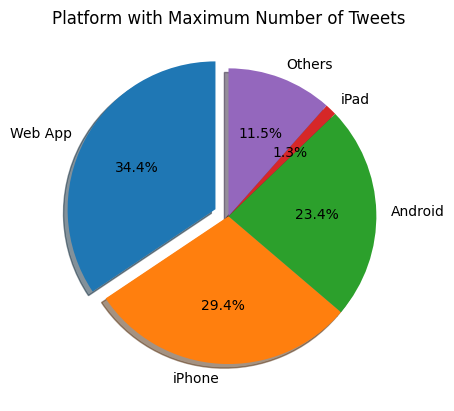

In [11]:
#Find out the platforms and their corresponding tweet count
platform_tweets = data['SourceLabel'].value_counts().sort_values(ascending=False)
print(platform_tweets)

#Platforms and their tweet count based on the above command. There are a total of 4001 tweets.
labels = 'Web App', 'iPhone', 'Android', 'iPad','Others'
sizes = [1376, 1175, 937, 51, 462]

explode = (0.1, 0, 0, 0,0)  # only "explode" the 1st slice (i.e. Web App)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.set_title("Platform with Maximum Number of Tweets")
plt.show()

# **Plot Source Reliability**

In [15]:
retweet_count = data['Retweet Count'].sum()
original_tweet_count = 4001 #from the no.of rows in the data collected
print(retweet_count)

10982


In [14]:
original_tweet_count = 4001

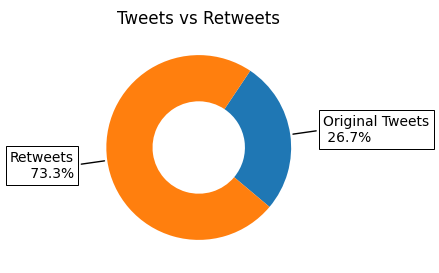

In [16]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Original Tweets\n 26.7%", "Retweets\n 73.3%"]

data = [4001, 10982] 

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Tweets vs Retweets")

plt.show()

# **Plot Language with Maximum Number of Tweets**

In [26]:
!pip install squarify

import matplotlib.pyplot as plt
import squarify
import seaborn as sb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
src = data['Language'].value_counts().sort_values(ascending=False)
source = src.head(10)
print(source)

en     1997
ja      958
es      311
pt      236
fr      105
ar       63
qme      39
fa       38
tr       35
zh       33
Name: Language, dtype: int64


(0.0, 100.0, 0.0, 100.0)

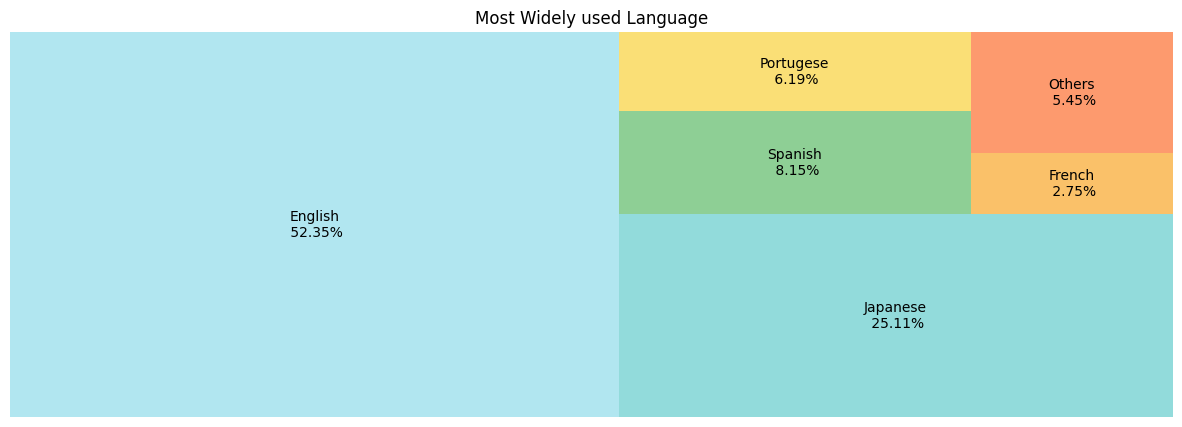

In [33]:
plt.figure(figsize=(15,5))

# Sample data
values = [1997, 958, 311, 236, 105,208] 
labels = ['English\n 52.35%', 'Japanese\n 25.11%', 'Spanish\n 8.15%', 'Portugese\n 6.19%','French\n 2.75%', 'Others\n 5.45%'] #the percentages are used in the figure

colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']
# Treemap
squarify.plot(sizes = values, label = labels,
              color = colors, alpha = 0.7)

plt.title('Most Widely used Language')

# Remove the axis:
plt.axis("off")

# plt.show() 

# Hashtags with Maximum Number of **Tweets**

['ChatGPT']                                               158
['AIArtwork', 'stablediffusion', 'stablediffusionart']     13
['AI', 'ChatGPT']                                          11
['ChatGPT', 'Bing', 'GoogleBard']                          10
['chatgpt']                                                 9
Name: Hashtags, dtype: int64


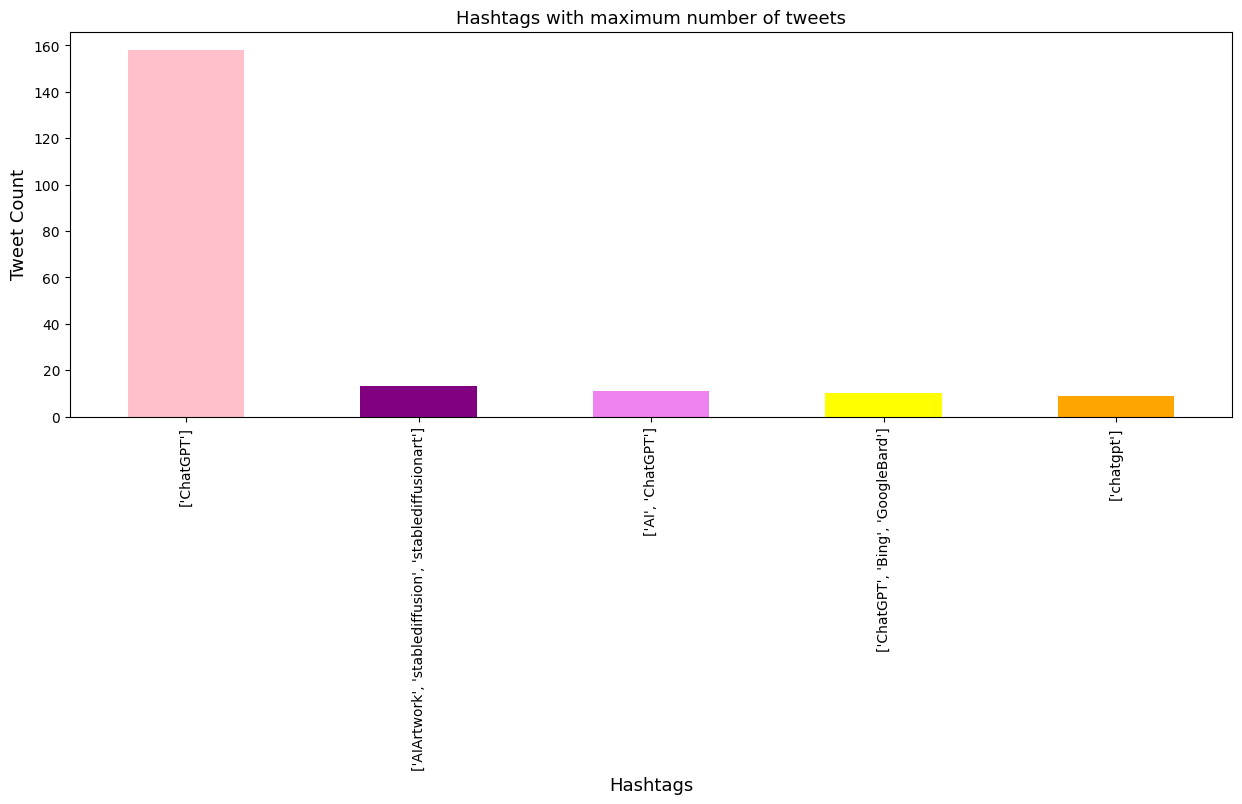

In [31]:
plt.figure(figsize=(15,5))
src = data['Hashtags'].value_counts().sort_values(ascending=False)
source = src.head(5)
print(source)
source.plot.bar(color=['pink','purple','violet','yellow','orange'])
plt.title('Hashtags with maximum number of tweets',size=13)
plt.xlabel('Hashtags',size=13)
plt.ylabel('Tweet Count',size=13)
plt.show()

# **Plot Users with Maximum Likes**

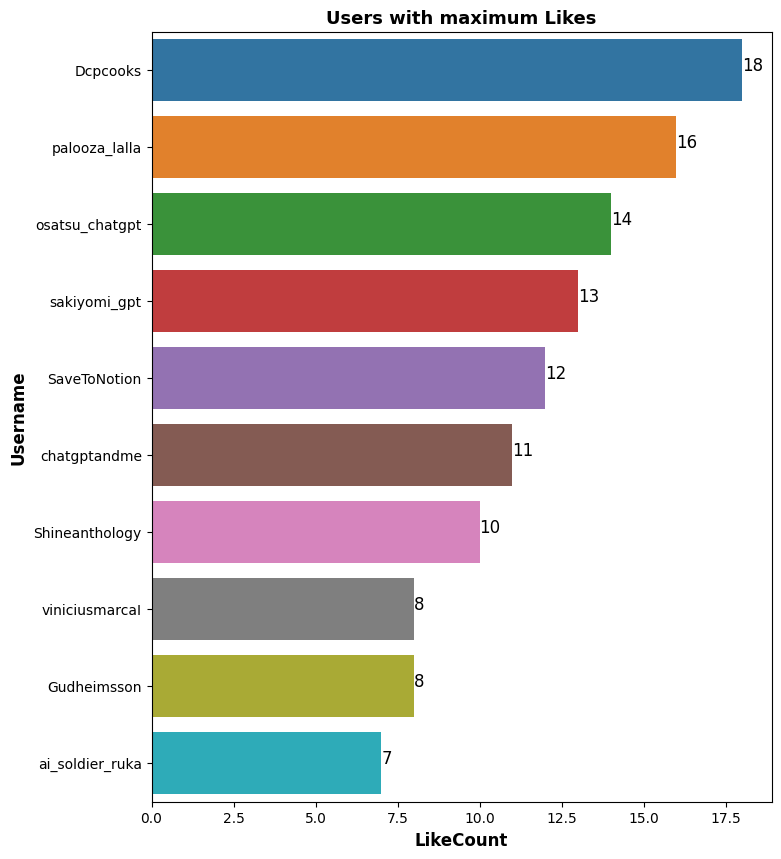

In [32]:
import seaborn as sns
username_count = data['Username'].value_counts().reset_index().rename(columns={
    'Username':'Like Count','index':'Username'})

plt.figure(figsize=(8, 10))
sns.barplot(y='Username',x='Like Count',data=username_count.head(10))
y=username_count['Like Count'].head(10)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Users with maximum Likes',weight='bold', size=13)
plt.ylabel('Username', size=12, weight='bold')
plt.xlabel('LikeCount', size=12, weight='bold')
plt.show()